# Machine Learning for Predection by Regression

## 1) Data collection (data ingestion) and some preliminary exploration

### 1.1) Importing libraries and frameworks

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from scipy.stats import shapiro
from sklearn import metrics
import numpy as np

from bi_functions_tobias import calculate_outliers


### 1.2) Reading the house-data file into a Data Frame (data ingestion)

In [6]:
df = pd.read_csv("house-data.csv")

In [7]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
df.shape

(21613, 21)

In [9]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### 1.3) Converting date to datetime type

In [13]:
df['date'] = pd.to_datetime(df['date'])

In [14]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [16]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

### 1.4) Sorting rows by date

In [18]:
df_sorted = df.sort_values(by='date', ascending=False)
df_sorted.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16594,9106000005,2015-05-27,1310000.0,4,2.25,3750,5000,2.0,0,0,...,8,2440,1310,1924,0,98115,47.6747,-122.303,2170,4590
13053,5101400871,2015-05-24,445500.0,2,1.75,1390,6670,1.0,0,0,...,6,720,670,1941,0,98115,47.6914,-122.308,920,6380
5637,7923600250,2015-05-15,450000.0,5,2.00,1870,7344,1.5,0,0,...,7,1870,0,1960,0,98007,47.5951,-122.144,1870,7650
928,8730000270,2015-05-14,359000.0,2,2.75,1370,1140,2.0,0,0,...,8,1080,290,2009,0,98133,47.7052,-122.343,1370,1090
6197,9178601660,2015-05-14,1695000.0,5,3.00,3320,5354,2.0,0,0,...,9,3320,0,2004,0,98103,47.6542,-122.331,2330,4040


### 1.5) Converting date to a timestamp so it's a numeric value that can be used in a correlation heat map

In [20]:
df['date_numeric'] = df['date'].map(pd.Timestamp.toordinal)

In [21]:
df_numeric = df["date_numeric"]
df_numeric.head()

0    735519
1    735576
2    735654
3    735576
4    735647
Name: date_numeric, dtype: int64

In [22]:
unique_date = df["date"].unique()
unique_date

<DatetimeArray>
['2014-10-13 00:00:00', '2014-12-09 00:00:00', '2015-02-25 00:00:00',
 '2015-02-18 00:00:00', '2014-05-12 00:00:00', '2014-06-27 00:00:00',
 '2015-01-15 00:00:00', '2015-04-15 00:00:00', '2015-03-12 00:00:00',
 '2015-04-03 00:00:00',
 ...
 '2015-03-08 00:00:00', '2014-08-30 00:00:00', '2015-05-27 00:00:00',
 '2015-03-22 00:00:00', '2015-02-15 00:00:00', '2014-10-11 00:00:00',
 '2015-02-01 00:00:00', '2014-11-30 00:00:00', '2014-08-24 00:00:00',
 '2014-07-27 00:00:00']
Length: 372, dtype: datetime64[ns]

In [23]:
unique_date_numeric = df["date_numeric"].unique()
unique_date_numeric.sort()
unique_date_numeric

array([735355, 735356, 735357, 735358, 735359, 735360, 735361, 735362,
       735363, 735364, 735365, 735366, 735367, 735368, 735369, 735370,
       735371, 735372, 735373, 735374, 735375, 735376, 735377, 735378,
       735379, 735380, 735381, 735382, 735383, 735384, 735385, 735386,
       735387, 735388, 735389, 735390, 735391, 735392, 735393, 735394,
       735395, 735396, 735397, 735398, 735399, 735400, 735401, 735402,
       735403, 735404, 735405, 735406, 735407, 735408, 735409, 735410,
       735411, 735412, 735413, 735414, 735415, 735416, 735417, 735418,
       735419, 735420, 735421, 735422, 735423, 735424, 735425, 735426,
       735427, 735428, 735429, 735430, 735431, 735432, 735433, 735434,
       735435, 735436, 735437, 735438, 735439, 735440, 735441, 735442,
       735443, 735444, 735445, 735446, 735447, 735448, 735449, 735450,
       735451, 735452, 735453, 735454, 735455, 735456, 735457, 735458,
       735459, 735460, 735461, 735462, 735463, 735464, 735465, 735466,
      

### 1.6) Checking if date should be in a linear correlation

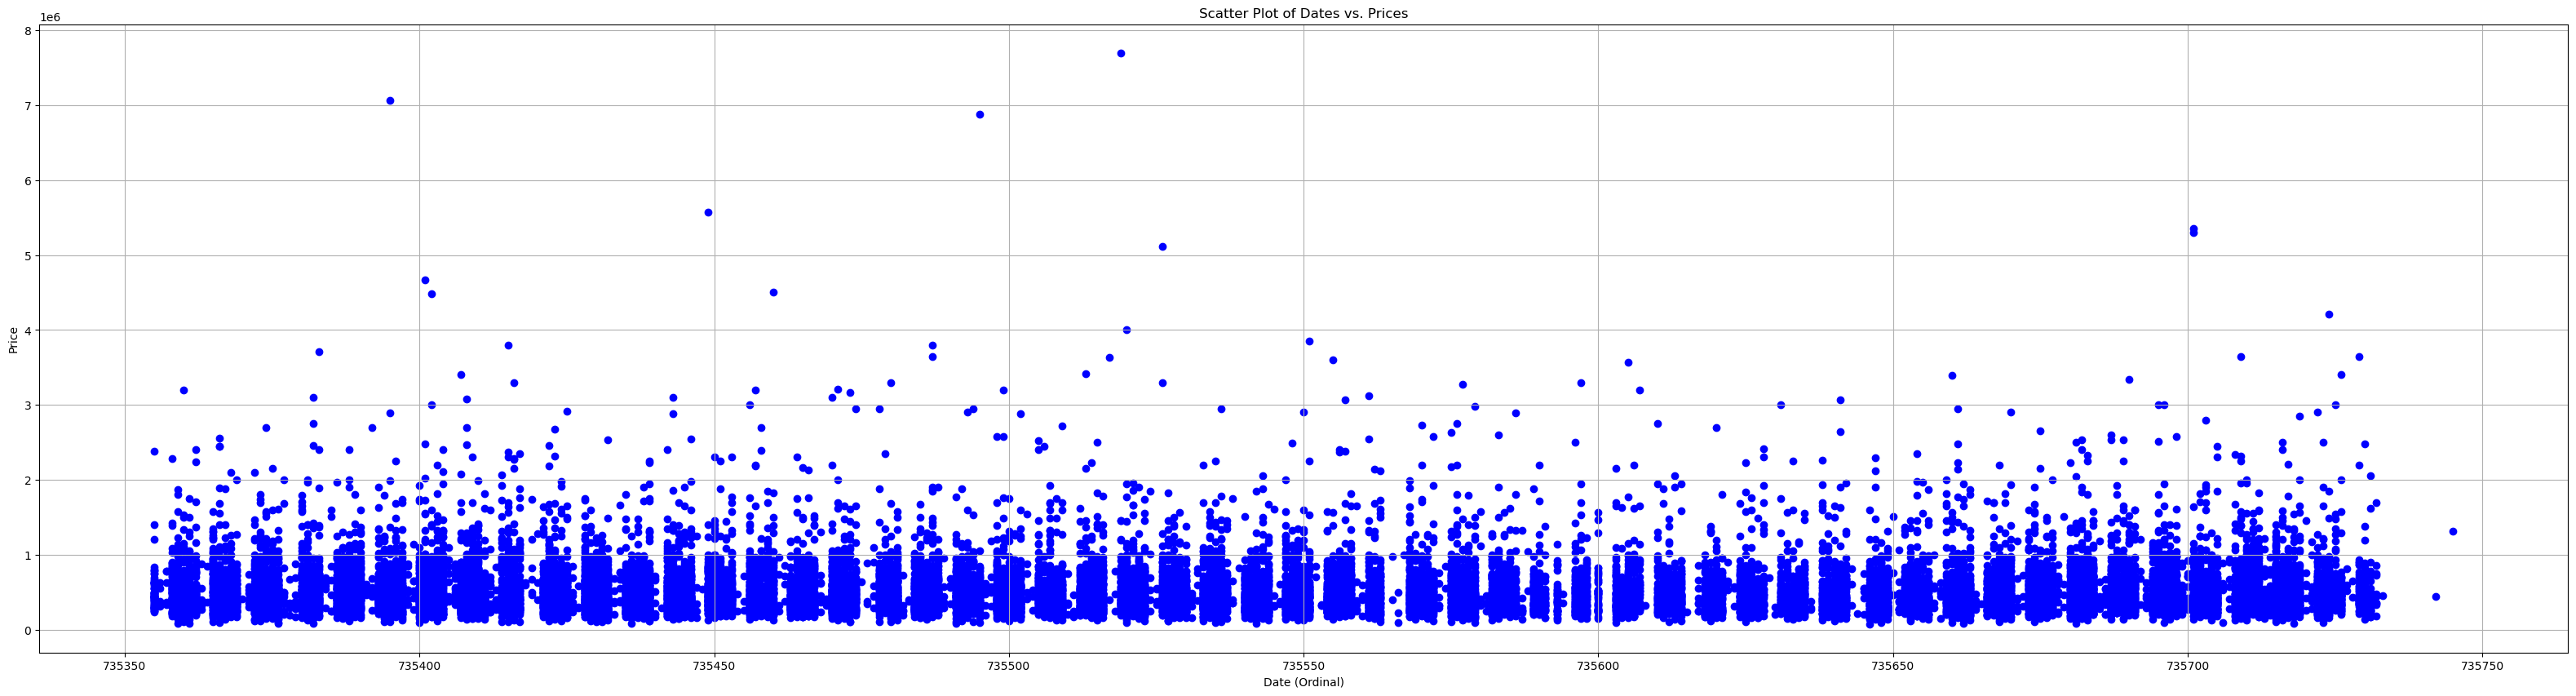

In [25]:
import matplotlib.dates as mdates

plt.figure(figsize=(40, 10))
plt.scatter(df['date_numeric'], df['price'], color='blue')
plt.title('Scatter Plot of Dates vs. Prices')
plt.xlabel('Date (Ordinal)')
plt.ylabel('Price')

plt.grid(True)
plt.show()

### 1.8) CREATING CORRELATION MATRIX as HEAT MAP to see if there is interesting correlations in the raw data

<function matplotlib.pyplot.show(close=None, block=None)>

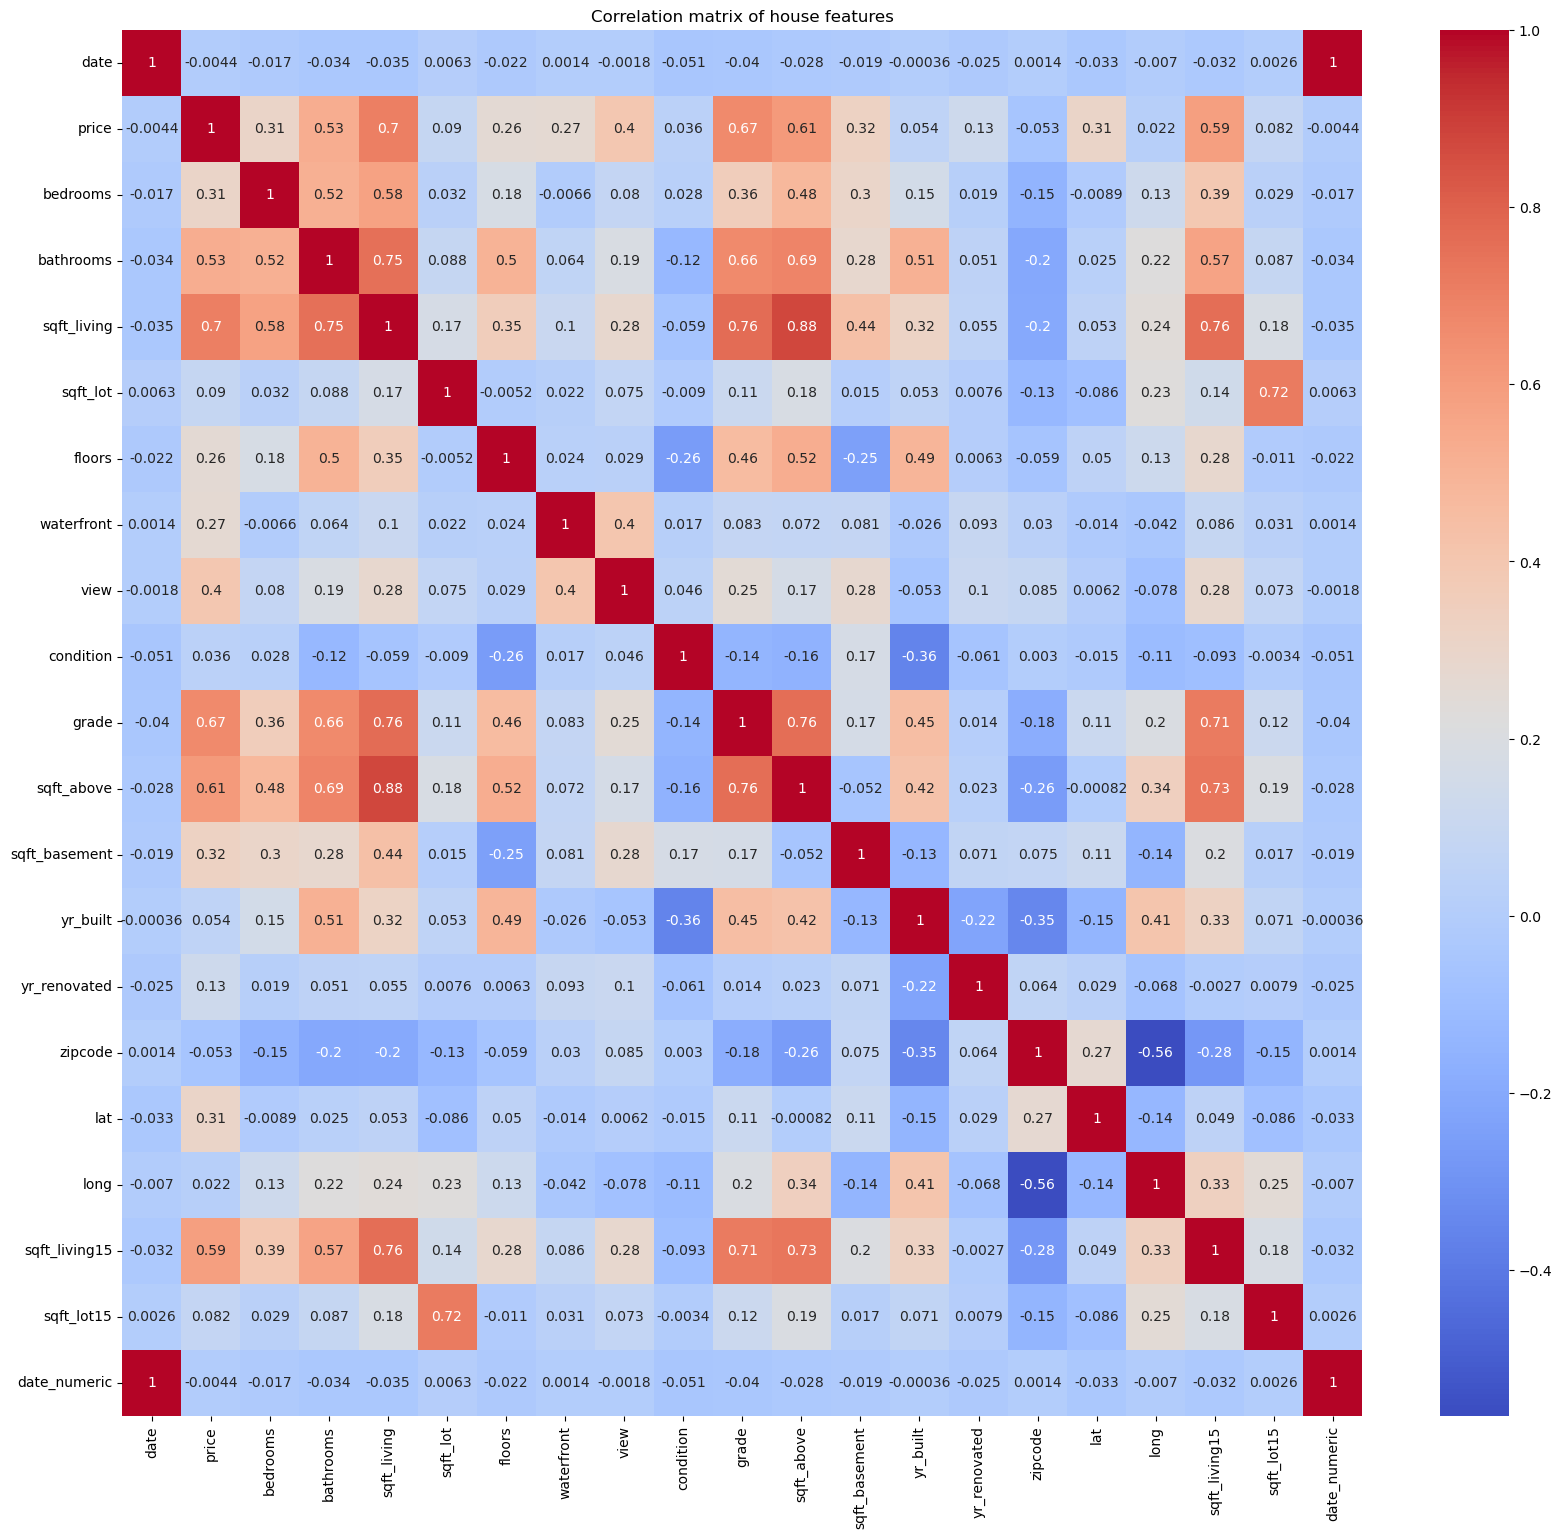

In [27]:
corr_matrix = df.drop(columns="id").corr()

plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation matrix of house features")
plt.show

### 1.8) Checking histograms of all columns to se if they have a normal distribution (bell curve)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>],
       [<Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>,
        <Axes: title={'center': 'date_numeric'}>]], dtype=object)

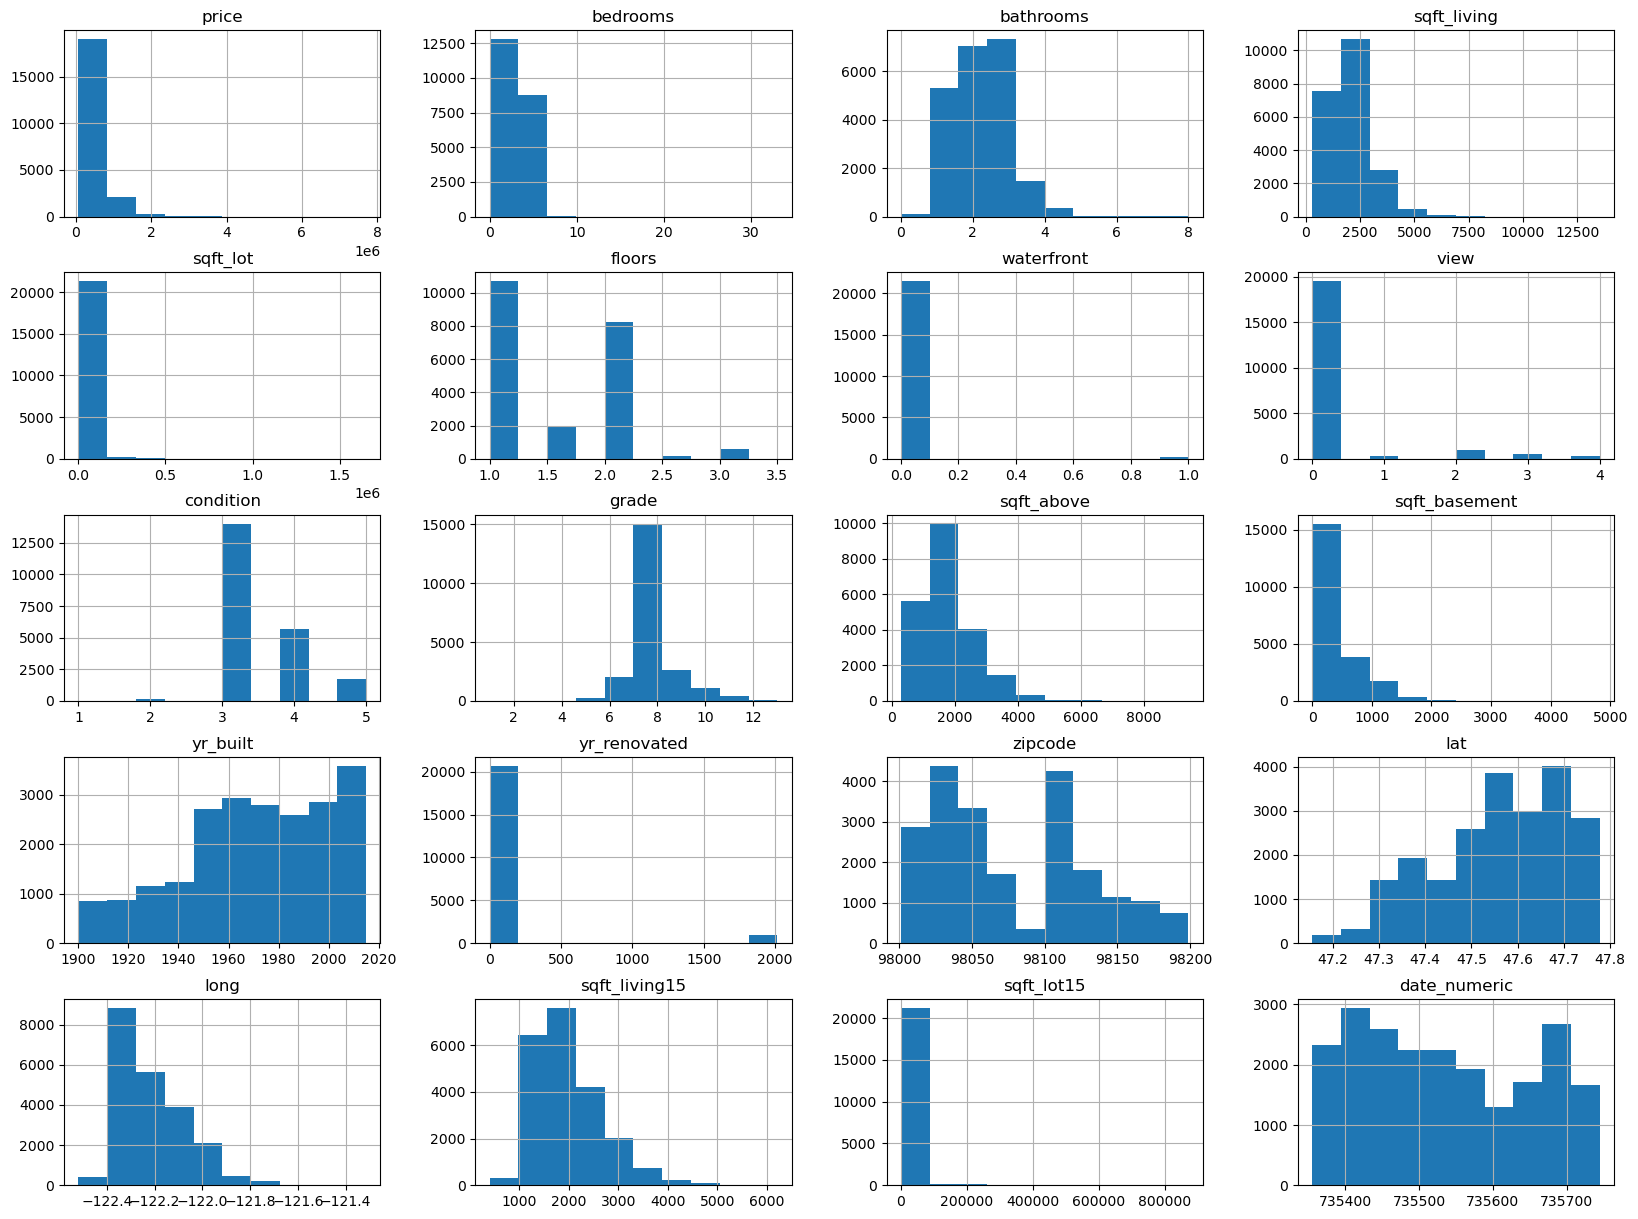

In [29]:
df.drop(columns=["date", "id"]).hist(figsize=(20, 15))

## 2) Cleaning the data

### 2.1) Checking for and dealing with missing values and 

In [32]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
date_numeric     0
dtype: int64

### 2.2) Checking for and dealing with duplicates

In [34]:
duplicates = df.duplicated(keep="first").sum()
duplicates

0

### 2.3) Checking if datatypes are usable for regression

In [36]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
date_numeric              int64
dtype: object

### 2.4) Checking for and dealing with outliers

#### 2.4.1) Using my function (using quantiles and inter quantile range) to calculate outliers

In [39]:
no_outliers_dict = calculate_outliers(df, False, True, True, 1.5, "date", "date_numeric", "view", "sqft_lot15", "yr_built", "condition", "bedrooms", "floors", "yr_renovated", "waterfront")

No outliers calculated for the column arguments
Number of outliers in id: 0
Number of outliers in price: 1146
Number of outliers in bathrooms: 571
Number of outliers in sqft_living: 572
Number of outliers in sqft_lot: 2425
Number of outliers in grade: 1911
Number of outliers in sqft_above: 611
Number of outliers in sqft_basement: 496
Number of outliers in zipcode: 0
Number of outliers in lat: 2
Number of outliers in long: 256
Number of outliers in sqft_living15: 544
Total number of rows deleted in returned data frame: 4675
Total number of outliers (if there is more outliers than deleted rows it means that some rows contain outliers in more than one column): 8534


In [40]:
no_outliers_dict = calculate_outliers(df, True, False, True, 3.5, "grade")

Outliers only calculated for the column arguments
Number of outliers in grade: 107
Total number of rows deleted in returned data frame: 107
Total number of outliers (if there is more outliers than deleted rows it means that some rows contain outliers in more than one column): 107


## 3) Making several regression models and do some data wrangling back and forth

### 3.1) Linear regression model (sqft_living and price)

#### 3.1.1) Shuffling the rows of df 

In [70]:
df_shuffled = shuffle(df, random_state=8)

#### 3.1.2) Defining X and y

In [73]:
# DV = Dependent variable

DV = 'price' # Save the DV as DV

# All columns except the DV is stored in X
#X = df_shuffled.drop(DV, axis=1) # get features (X)
X = df_shuffled[["sqft_living"]]

# A Series of the DV values
y = df_shuffled[DV] # get DV (y)

#### 3.1.3) Creating model instance of LinearRegresion()

In [76]:
model = LinearRegression()

#### 3.1.4) Splitting the data in train and test sets

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### 3.1.5) Training the model

In [82]:
model.fit(X_train, y_train)

LinearRegression()

#### 3.1.6) Making predictions with the model on the test set

In [85]:
predictions = model.predict(X_test)
print(predictions)

[ 561353.29669727  753076.25610923  578024.85838526 ... 1008706.8686585
  183464.56510268  300165.49691866]


#### 3.1.7) Showing the predicted values against the actual values in a scatterplot

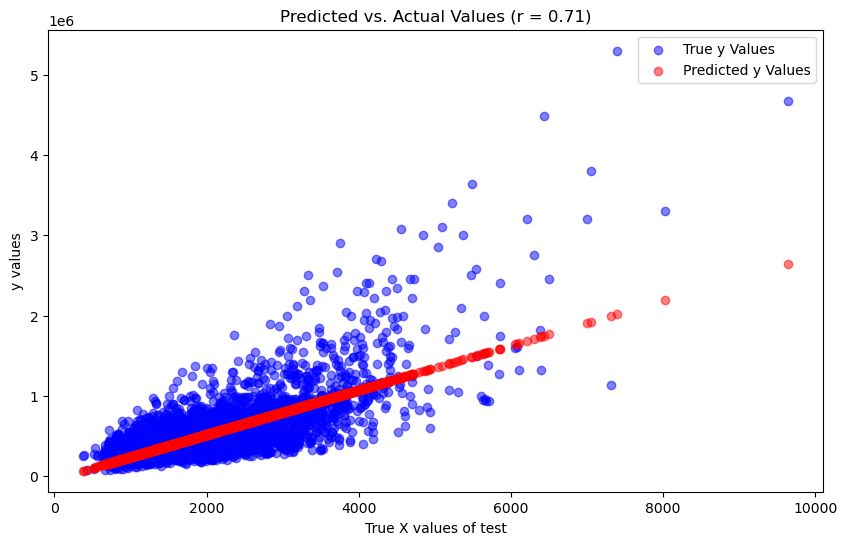

In [88]:
# Plotting both true values and predictions
plt.figure(figsize=(10, 6))

# Scatter plot for true values
plt.scatter(X_test, y_test, color='blue', label='True y Values', alpha=0.5)

# Scatter plot for predictions
plt.scatter(X_test, predictions, color='red', label='Predicted y Values', alpha=0.5)

# Adding labels, title, and legend
plt.xlabel('True X values of test')
plt.ylabel('y values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test, predictions)[0]))
plt.legend()

# Display the plot
plt.show()

#### 3.1.8) Histplot of the residuals to se if they form a curve bell

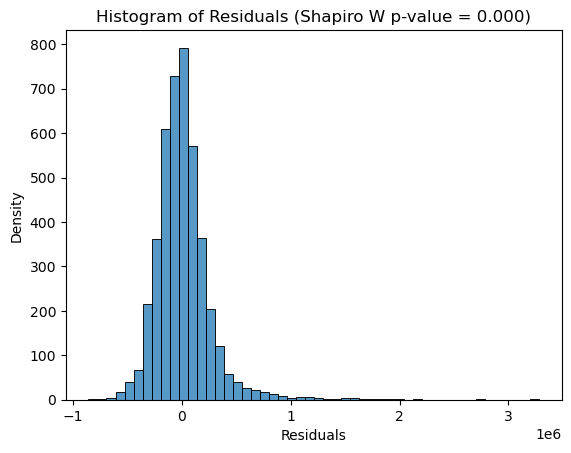

In [91]:

sns.histplot((y_test - predictions), bins = 50)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Histogram of Residuals (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test - predictions)[1]))
plt.show()


#### 3.1.9) Measuring the mean abs error, the mean squared error, the mean sqrt of mean squared error, and the R2 do see the strength of the model

In [96]:

metrics_df = pd.DataFrame({'Metric': ['MAE', 
                                      'MSE', 
                                      'RMSE', 
                                      'R-Squared'],
                          'Value': [metrics.mean_absolute_error(y_test, predictions),
                                    metrics.mean_squared_error(y_test, predictions),
                                    np.sqrt(metrics.mean_squared_error(y_test, predictions)),
                                    metrics.explained_variance_score(y_test, predictions)]}).round(3)

# Format the 'Value' column to display with 3 decimals
metrics_df['Value'] = metrics_df['Value'].apply(lambda x: f'{x:.3f}')

print(metrics_df)

      Metric            Value
0        MAE       172876.788
1        MSE  68427358734.053
2       RMSE       261586.236
3  R-Squared            0.505


#### 3.1.10) Checking if the models fits better if I remove the outliers 

In [111]:
dict_of_data = calculate_outliers(df_shuffled, False, False, False, 2, "sqft_living", "price")

Outliers only calculated for the column arguments
Number of outliers in sqft_living: 258
Number of outliers in price: 810
Total number of rows deleted in returned data frame: 884
Total number of outliers (if there is more outliers than deleted rows it means that some rows contain outliers in more than one column): 1068


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_numeric,ID
3561,1257201295,2014-07-08,480000.0,2,1.00,1060,3040,1.0,0,0,...,200,1924,0,98103,47.6725,-122.329,1470,3814,735422,1
10112,8861700030,2014-12-12,510000.0,3,1.50,2400,10275,1.0,0,0,...,860,1964,0,98052,47.6888,-122.126,2380,10125,735579,2
18595,3826000735,2014-06-26,202000.0,2,1.00,920,7569,1.0,0,0,...,0,1950,0,98168,47.4951,-122.302,1280,7627,735410,3
14214,8857100180,2015-04-13,350000.0,3,2.25,1410,1340,2.0,0,0,...,40,1967,0,98008,47.6108,-122.113,1730,2748,735701,4
19042,2325039067,2014-05-07,690000.0,3,2.00,1760,6428,1.0,0,0,...,780,1942,0,98199,47.6388,-122.397,1760,6004,735360,5


In [115]:
model1 = LinearRegression()

X1 = df_no_out[["sqft_living"]]
y1 = df_no_out["price"]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=42)



model1.fit(X_train1, y_train1)

pred1 = model1.predict(X_test1)

metrics_df1 = pd.DataFrame({'Metric': ['MAE', 
                                      'MSE', 
                                      'RMSE', 
                                      'R-Squared'],
                          'Value': [metrics.mean_absolute_error(y_test1, pred1),
                                    metrics.mean_squared_error(y_test1, pred1),
                                    np.sqrt(metrics.mean_squared_error(y_test1, pred1)),
                                    metrics.explained_variance_score(y_test1, pred1)]}).round(3)

# Format the 'Value' column to display with 3 decimals
metrics_df1['Value'] = metrics_df1['Value'].apply(lambda x: f'{x:.3f}')

print(metrics_df1)

      Metric            Value
0        MAE       136583.161
1        MSE  29406197284.234
2       RMSE       171482.353
3  R-Squared            0.395


------------------------------------ It did NOT make the model better -------------------------------------

In [ ]:
3.1) Linear regression model (sqft_living and price)